# **ES 114 Probability Lab Assignment - 10**

Name- Shardul Rakesh Junagade

Roll No- 23110297

# **Data Narrative on ATP Tennis Match Trends (2000-2024)**

In this notebook, I have done statistical analysis and exploration of ATP (Association of Tennis Professionals) match data spanning from the year 2000 to 2024. The dataset can be downloaded from here: https://data.world/tylerudite/atp-match-data?authuser=0 .

This assignment addresses 15 non-trivial questions related to different aspects of ATP data, including trends in players, matches, tournaments, surfaces, and the performance of betting platforms.
By analyzing these questions, the aim is to uncover hidden patterns, correlations, and insights that can help understand the dynamics of professional tennis and its players.



## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Loading the Datasets

The datasets used in this assignment include:

1. **atp_players.csv**: Contains information about ATP players, such as their names, flags, and physical attributes (height, weight, etc.).
2. **atp_XXXX.xls / atp_XXXX.xlsx**: Contain match data for each year from 2000 to 2024. Each row represents a match, with columns detailing the winner, loser, surface type, tournament, and other match statistics.

In [2]:
atp_players=pd.read_csv('./tylerudite-atp-match-data/atp_players.csv')
display(atp_players)

,player_id,first_name,first_initial,last_name,full_name,player_url,flag_code,residence,birthplace,birthdate,...,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand
0,a002,Ricardo,R,Acuna,Acuna R,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",19580113,...,1.0,13.0,0.0,150.0,68.0,"5'9""",69.0,175.0,NaN,NaN
1,a001,Sadiq,S,Abdullahi,Abdullahi S,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,19600202,...,2.0,2.0,0.0,0.0,0.0,"0'0""",0.0,0.0,NaN,NaN
2,a005,Nelson,N,Aerts,Aerts N,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",19630425,...,4.0,25.0,0.0,165.0,75.0,"6'2""",74.0,188.0,NaN,NaN
3,a004,Egan,E,Adams,Adams E,http://www.atpworldtour.com/en/players/egan-ad...,USA,"Palmetto, FL, USA","Miami Beach, FL, USA",19590615,...,6.0,15.0,0.0,160.0,73.0,"5'10""",70.0,178.0,NaN,NaN
4,a006,Ronald,R,Agenor,Agenor R,http://www.atpworldtour.com/en/players/ronald-...,USA,"Beverly Hills, California, USA","Rabat, Morocco",19641113,...,11.0,13.0,1983.0,180.0,82.0,"5'11""",71.0,180.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10907,z435,A.,A,Zorab,Zorab A,http://www.atpworldtour.com/en/players/a-zorab...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10908,z437,J.,J,Zimmermann,Zimmermann J,http://www.atpworldtour.com/en/players/j-zimme...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10909,z436,G.,G,Zinn,Zinn G,http://www.atpworldtour.com/en/players/g-zinn/...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10910,z440,C.,C,Zenger,Zenger C,http://www.atpworldtour.com/en/players/c-zenge...,GER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')
all_years_data=[]
for year in range(2000, 2013):
	year_data = pd.read_excel(f"./tylerudite-atp-match-data/atp_{year}.xls", engine='xlrd')
	all_years_data.append(year_data)
for year in range(2013, 2025):
	year_data = pd.read_excel(f"./tylerudite-atp-match-data/atp_{year}.xlsx", engine='openpyxl')
	all_years_data.append(year_data)
db=pd.concat(all_years_data, ignore_index=True)
db['date'] = pd.to_datetime(db['Date'])
db['year'] = db['Date'].dt.year
db['month'] = db['Date'].dt.month
warnings.filterwarnings('default', category=UserWarning, module='openpyxl')

In [4]:
pd.set_option('display.max_columns', None)
display(db)

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,CBW,CBL,GBW,GBL,IWW,IWL,SBW,SBL,B365W,B365L,B&WW,B&WL,EXW,EXL,PSW,PSL,WPts,LPts,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL,date,year,month
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3.0,Dosedel S.,Ljubicic I.,63,77,6.0,4.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-03,2000,1
1,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3.0,Enqvist T.,Clement A.,5,56,6.0,3.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-03,2000,1
2,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3.0,Escude N.,Baccanello P.,40,655,6.0,7.0,7.0,5.0,6.0,3.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-03,2000,1
3,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3.0,Federer R.,Knippschild J.,65,87,6.0,1.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-03,2000,1
4,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3.0,Fromberg R.,Woodbridge T.,81,198,7.0,6.0,5.0,7.0,6.0,4.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-03,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64926,24,Monte Carlo,Monte Carlo Masters,2024-04-12,Masters 1000,Outdoor,Clay,Quarterfinals,3.0,Djokovic N.,De Minaur A.,1,11.0,7.0,5.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.22,4.33,NaN,NaN,NaN,NaN,1.27,4.20,9725.0,3355.0,NaN,NaN,NaN,NaN,NaN,NaN,1.29,4.34,1.24,4.04,2024-04-12,2024,4
64927,24,Monte Carlo,Monte Carlo Masters,2024-04-12,Masters 1000,Outdoor,Clay,Quarterfinals,3.0,Ruud C.,Humbert U.,10,15.0,6.0,3.0,4.0,6.0,6.0,1.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30,3.50,NaN,NaN,NaN,NaN,1.33,3.64,3465.0,2425.0,NaN,NaN,NaN,NaN,NaN,NaN,1.33,3.64,1.31,3.43,2024-04-12,2024,4
64928,24,Monte Carlo,Monte Carlo Masters,2024-04-13,Masters 1000,Outdoor,Clay,Semifinals,3.0,Tsitsipas S.,Sinner J.,12,2.0,6.0,4.0,3.0,6.0,6.0,4.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.75,1.29,NaN,NaN,NaN,NaN,3.99,1.29,3175.0,8710.0,NaN,NaN,NaN,NaN,NaN,NaN,3.99,1.31,3.62,1.28,2024-04-13,2024,4
64929,24,Monte Carlo,Monte Carlo Masters,2024-04-13,Masters 1000,Outdoor,Clay,Semifinals,3.0,Ruud C.,Djokovic N.,10,1.0,6.0,4.0,1.0,6.0,6.0,4.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,1.40,NaN,NaN,NaN,NaN,3.10,1.43,3465.0,9725.0,NaN,NaN,NaN,NaN,NaN,NaN,3.19,1.44,2.90,1.41,2024-04-13,2024,4


## Question 1

Q1) Analyse the trends in number of unique ATP players playing in tournaments each year. Assume that every player who has lost in a year, has won atleast one match that.

Mean = 214
Median = 215



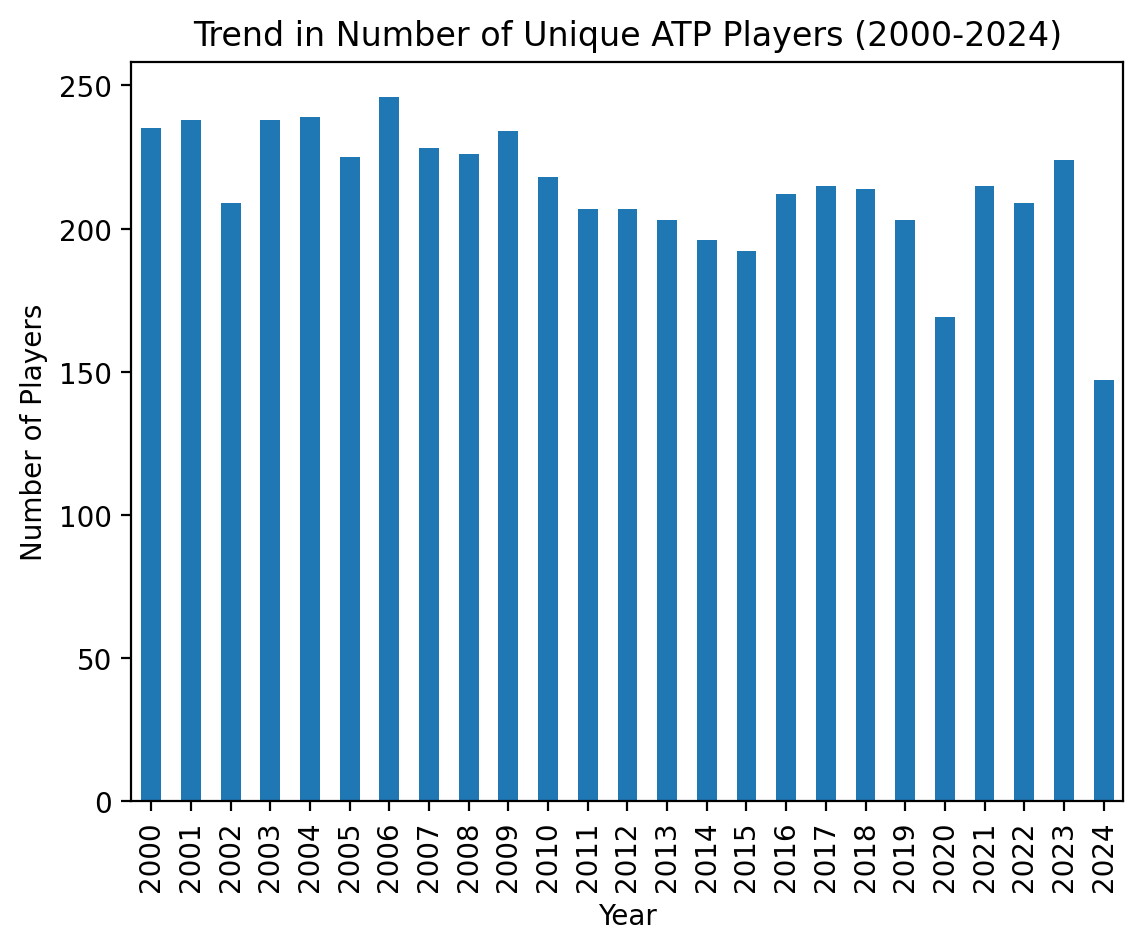

In [5]:
num_players=db.groupby('year')['Winner'].nunique()
# print(db.groupby('year')['Winner'])
mean=num_players.mean()
median=num_players.median()
print("Mean =", round(mean))
print("Median =", int(median), end="\n\n")
num_players.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Number of Players")
plt.title("Trend in Number of Unique ATP Players (2000-2024)")
plt.show()

- We can see that there has been a slight decrease in the number of unique ATP players playing in tournaments during the period of 2010-2015.
- The number of ATP players was observed in the year 2020.
- Mean ATP players playing in tournaments each year was found to be 214.
- Median was found to be 215.
- The number is low for 2024 because the year has just started 4 months ago.

## Question 2

Q2) Analyse the trends in the number of matches played each year.

Mean = 2597
Median = 2675



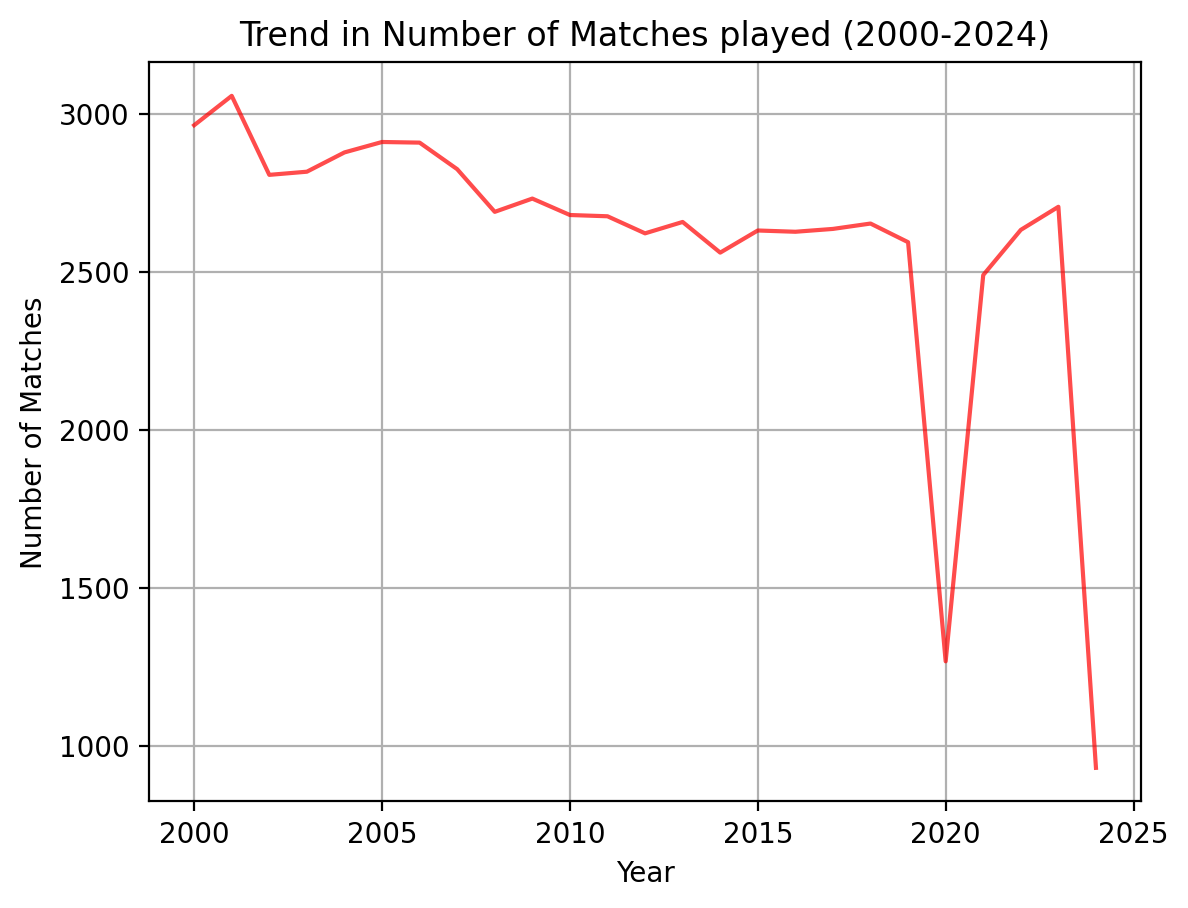

In [6]:
matches_per_year=db.groupby('year').size()
mean=matches_per_year.mean()
median=matches_per_year.median()
print("Mean =", round(mean))
print("Median =", int(median), end="\n\n")
matches_per_year.plot(kind="line", color="red", alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.title("Trend in Number of Matches played (2000-2024)")
plt.grid(True)
plt.show()

- We can observe a decreasing trend in the number of matches played each year.
- Less than 1500 matches were played during the year 2020.

## Question 3

Q3) Analyse the trends in number of tournaments hosted per year.

Total number of different tournaments played throughout the years = 262
Mean = 63
Median = 66



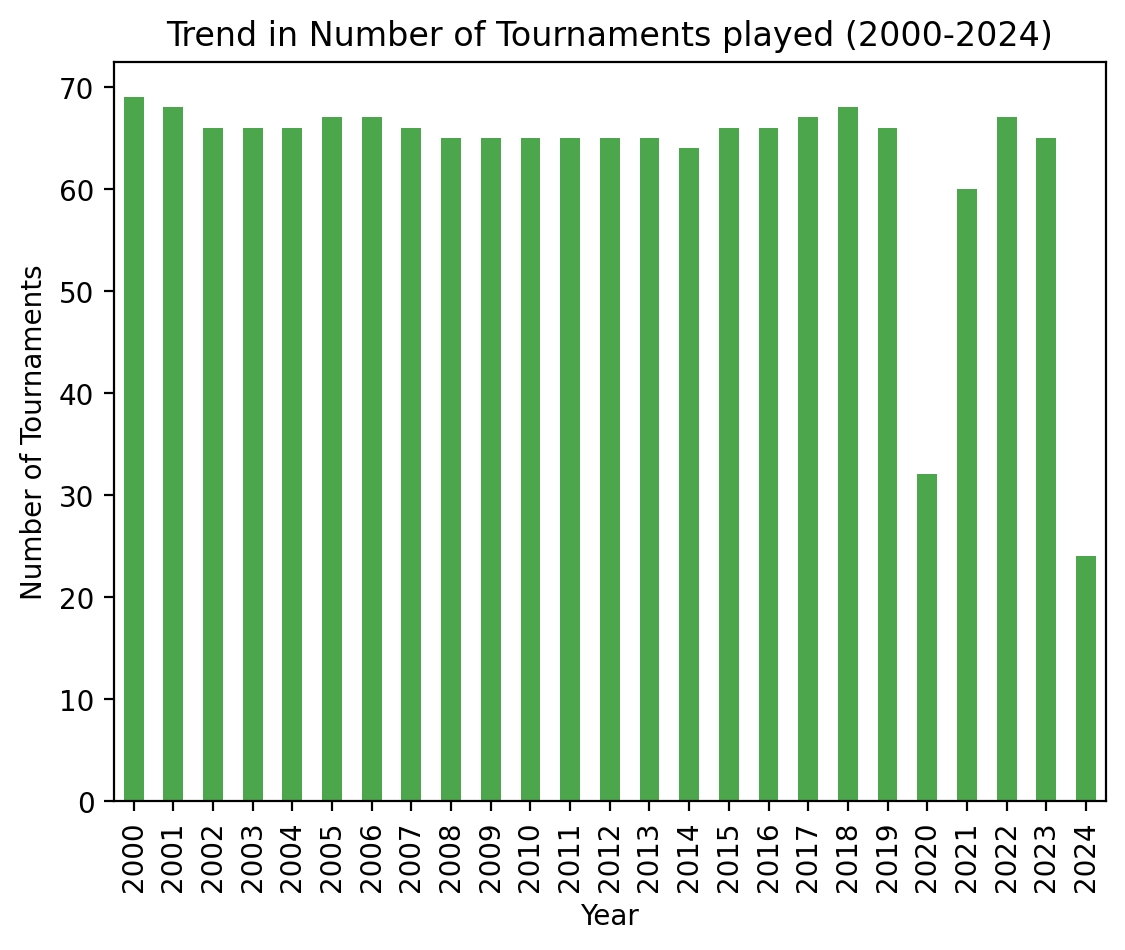

In [7]:
num_tournaments=db["Tournament"].nunique()
print("Total number of different tournaments played throughout the years =", num_tournaments)
tournaments_per_year=db.groupby("year")["Tournament"].nunique()
mean=tournaments_per_year.mean()
median=tournaments_per_year.median()
print("Mean =", round(mean))
print("Median =", int(median), end="\n\n")
tournaments_per_year.plot(kind="bar", color="green", alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Number of Tournaments")
plt.title("Trend in Number of Tournaments played (2000-2024)")
plt.show()

- 262 unique tournaments have been held over the last 24 years.
- On average, 63 tournaments were conducted every year.
- Very less tournaments were held in the year 2020, which explains the less number of players during that year. The reason behind this might be the start of COVID, due to which lockdowns were imposed.

## Question 4

Q4) Analyse the trends in the number of tournaments help based upon the surfaces.

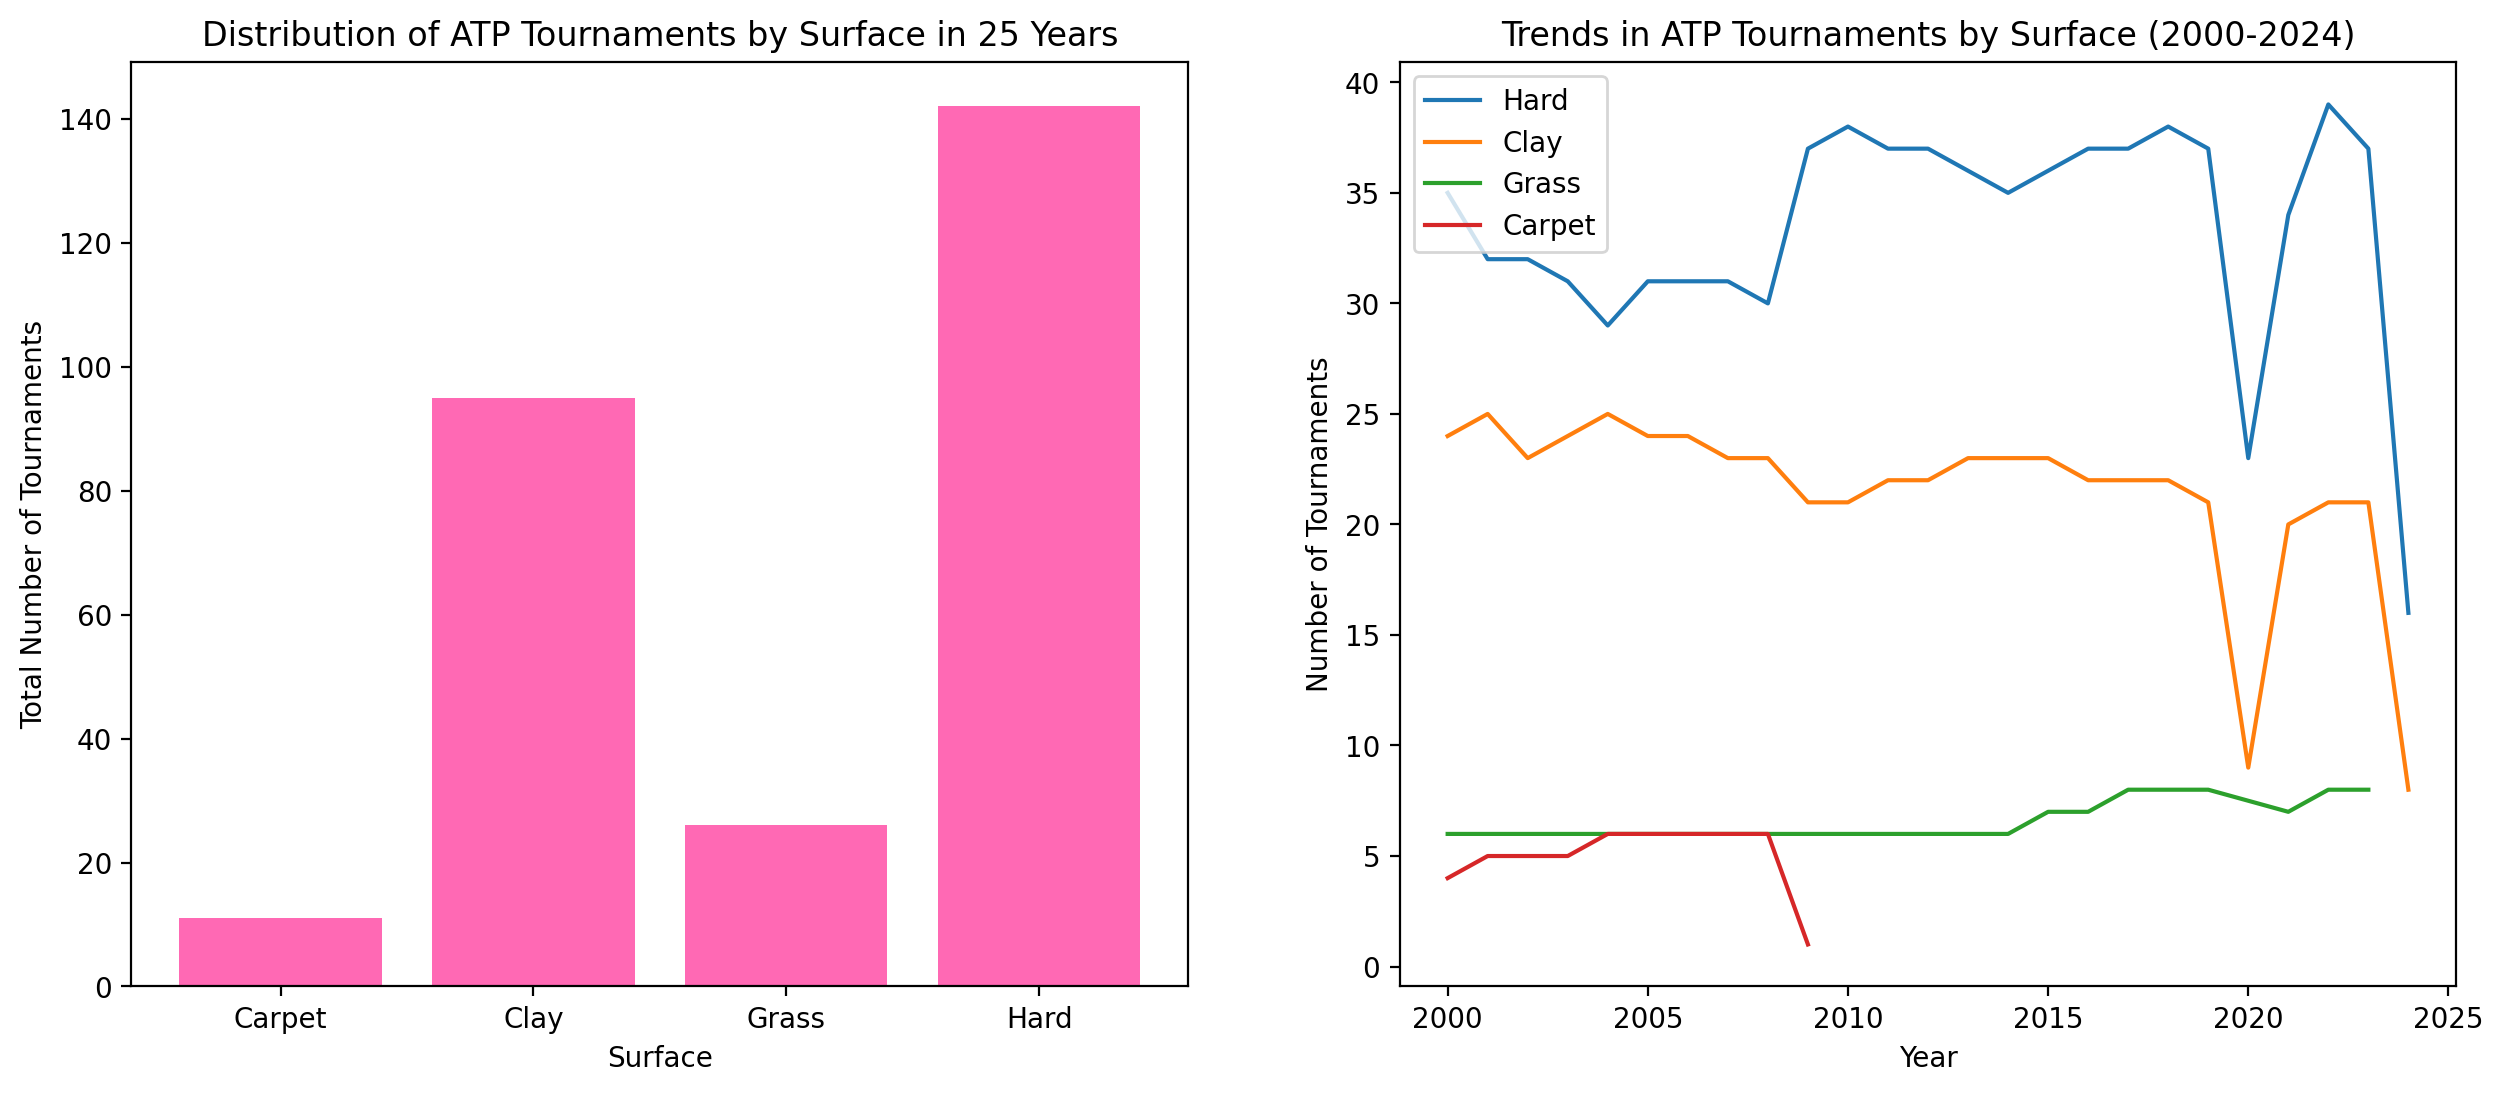

In [8]:
plt.figure(figsize=(15,6))
# Total tournaments per surface
plt.subplot(1,2,1)
tournaments_per_surface =db.groupby('Surface')['Tournament'].nunique()
plt.bar(tournaments_per_surface.index, tournaments_per_surface.values,color="hotpink")
plt.xlabel('Surface')
plt.ylabel('Total Number of Tournaments')
plt.title('Distribution of ATP Tournaments by Surface in 25 Years')


# Total tournaments per year per surface
plt.subplot(1,2,2)
tournaments_per_year_surface = db.groupby(['year','Surface'])['Tournament'].nunique()
# display(tournaments_per_year_surface)
for surface in db['Surface'].unique():
    surface_data=tournaments_per_year_surface.xs(surface, level='Surface')
    plt.plot(surface_data.index, surface_data.values, label=surface)
plt.xlabel('Year')
plt.ylabel('Number of Tournaments')
plt.title('Trends in ATP Tournaments by Surface (2000-2024)')
plt.legend(loc=0)
plt.show()

- It can be observed that majority of matches were played on Hard surface each year, thus making it the general surface for playing tennis.

## Question 5

Q5) In which cities, majority of the tournaments have taken place?

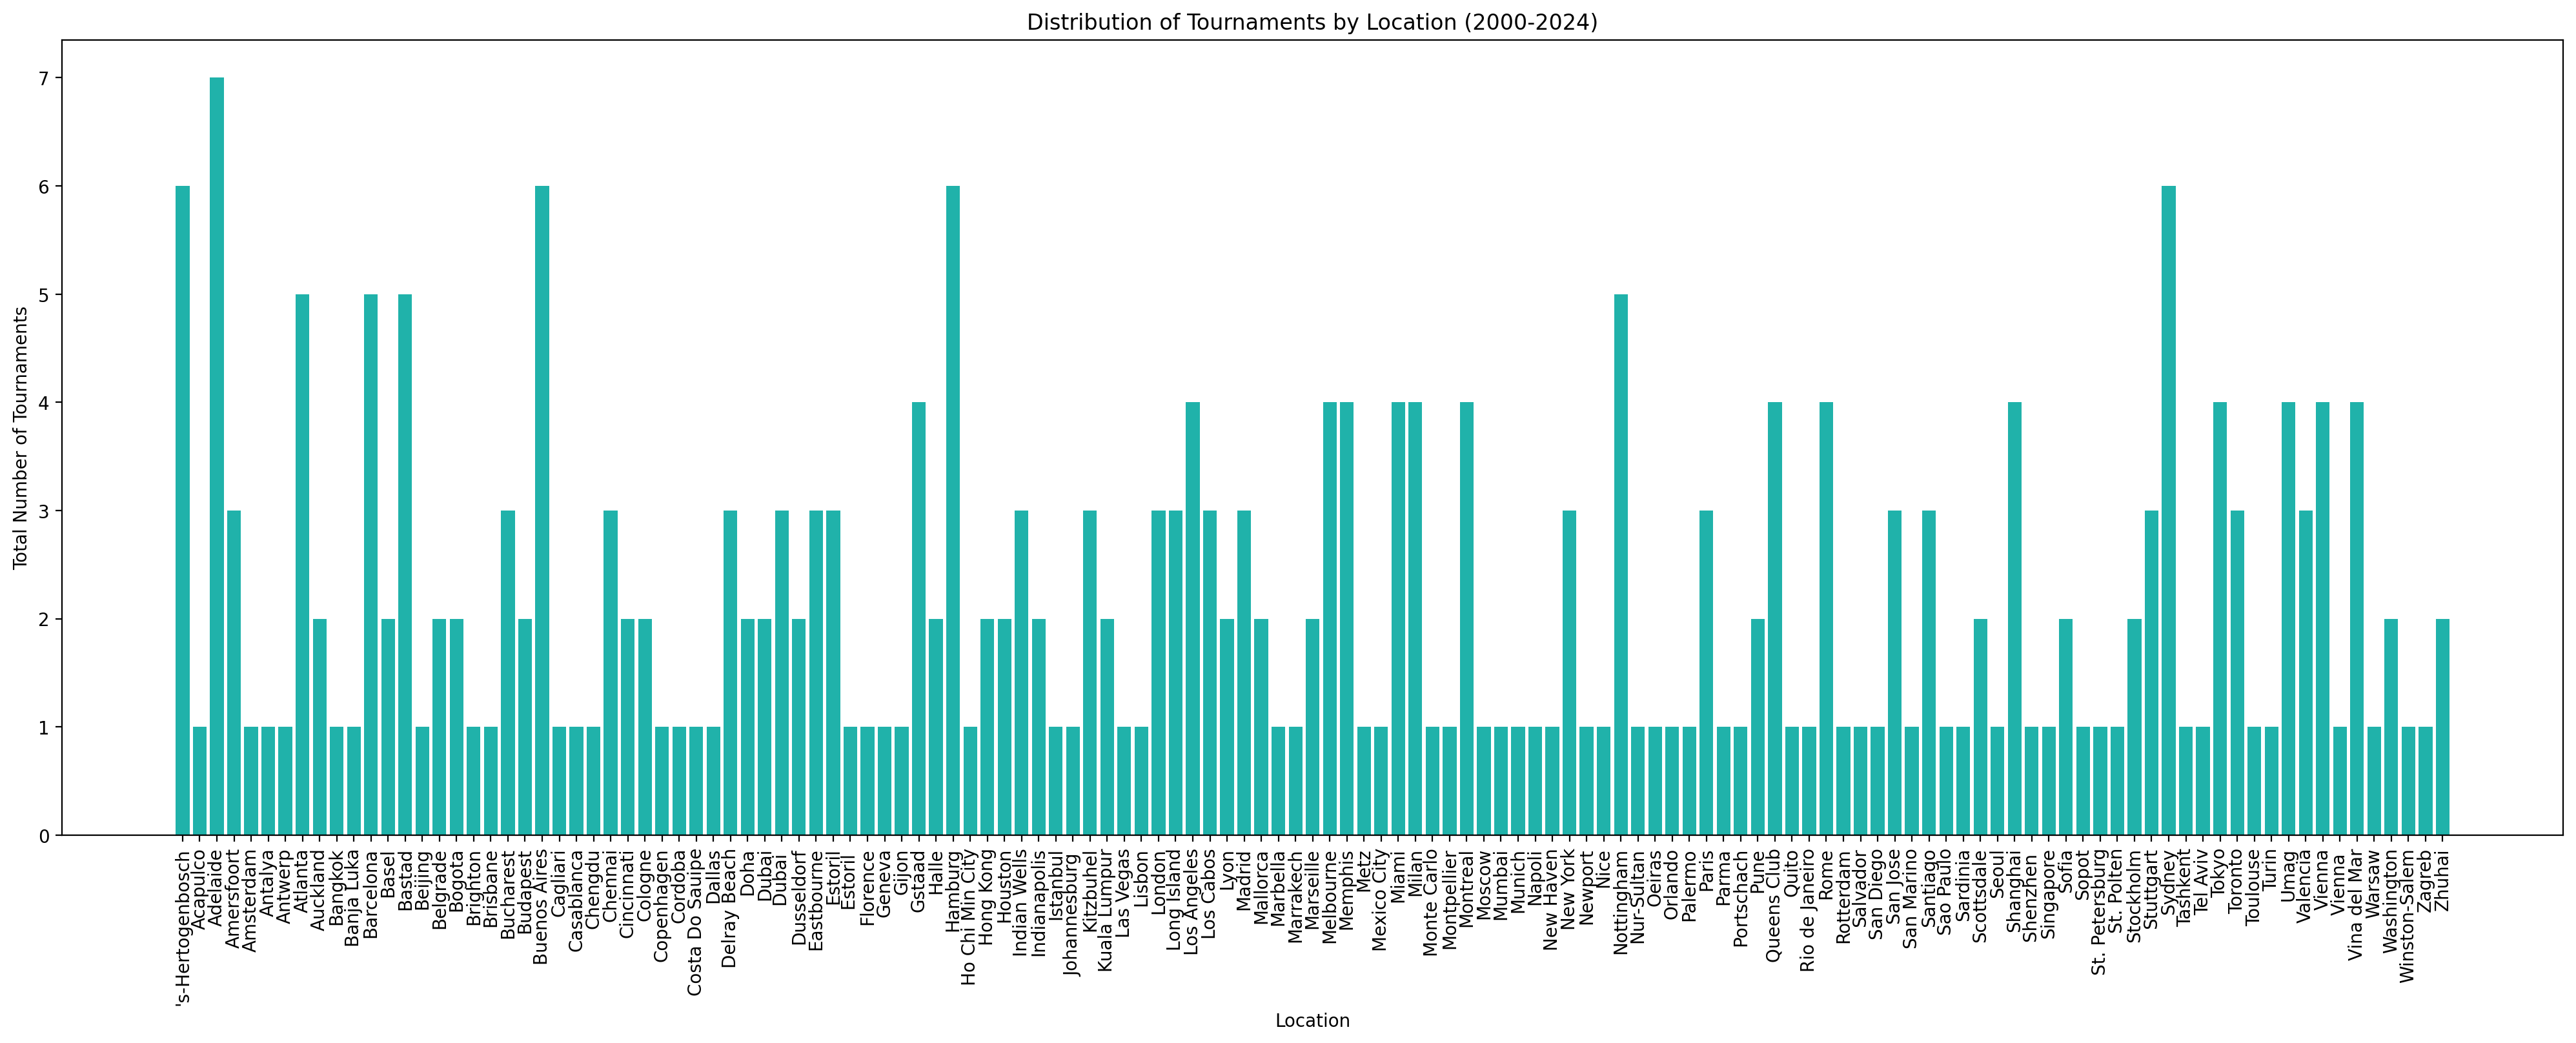

In [9]:
plt.figure(figsize=(25,8))
tournaments_per_region = db.groupby('Location')['Tournament'].nunique()

plt.bar(tournaments_per_region.index, tournaments_per_region.values, color="lightseagreen")
plt.xlabel('Location')
plt.xticks(rotation=90)
plt.ylabel('Total Number of Tournaments')
plt.title('Distribution of Tournaments by Location (2000-2024)')
plt.show()

- It can be observed that majority of the tournaments took place in cities like Adelaide,'s-Hertogenbosch, Buenos Aires, Halle, Sydney and Nottingham.

## Question 6

Q6) Identify players having top 10 win streaks on specific surfaces through the years.

In [10]:
def calculate_longest_streaks(df, surface):
    df_surface = df[df['Surface']==surface]
    streaks=[]
    current_streak=0
    current_player=None
    for index, row in df_surface.iterrows():
        if row['Winner']==current_player:
            current_streak+=1
        else:
            streaks.append((current_player, current_streak))
            current_player=row['Winner']
            current_streak=1
    # Handle the last streak
    streaks.append((current_player, current_streak))
    return streaks

streaks_on_hard=calculate_longest_streaks(db, 'Hard')

longest_clay_streaks = sorted(streaks_on_hard, key=lambda x:x[1], reverse=True)
print("Top 10 Winning Streaks on Hard Surface:\n")
for player, streak_length in longest_clay_streaks[:10]:
    print(f"{player} : {streak_length} matches")

Top 10 Winning Streaks on Hard Surface:

Agassi A. : 3 matches
Hewitt L. : 3 matches
Kafelnikov Y. : 3 matches
Federer R. : 3 matches
Moya C. : 3 matches
Djokovic N. : 3 matches
Hewitt L. : 2 matches
Norman M. : 2 matches
Kiefer N. : 2 matches
Rosset M. : 2 matches


## Question 7

Q7) What is the PMF of the number of sets played in all matches?

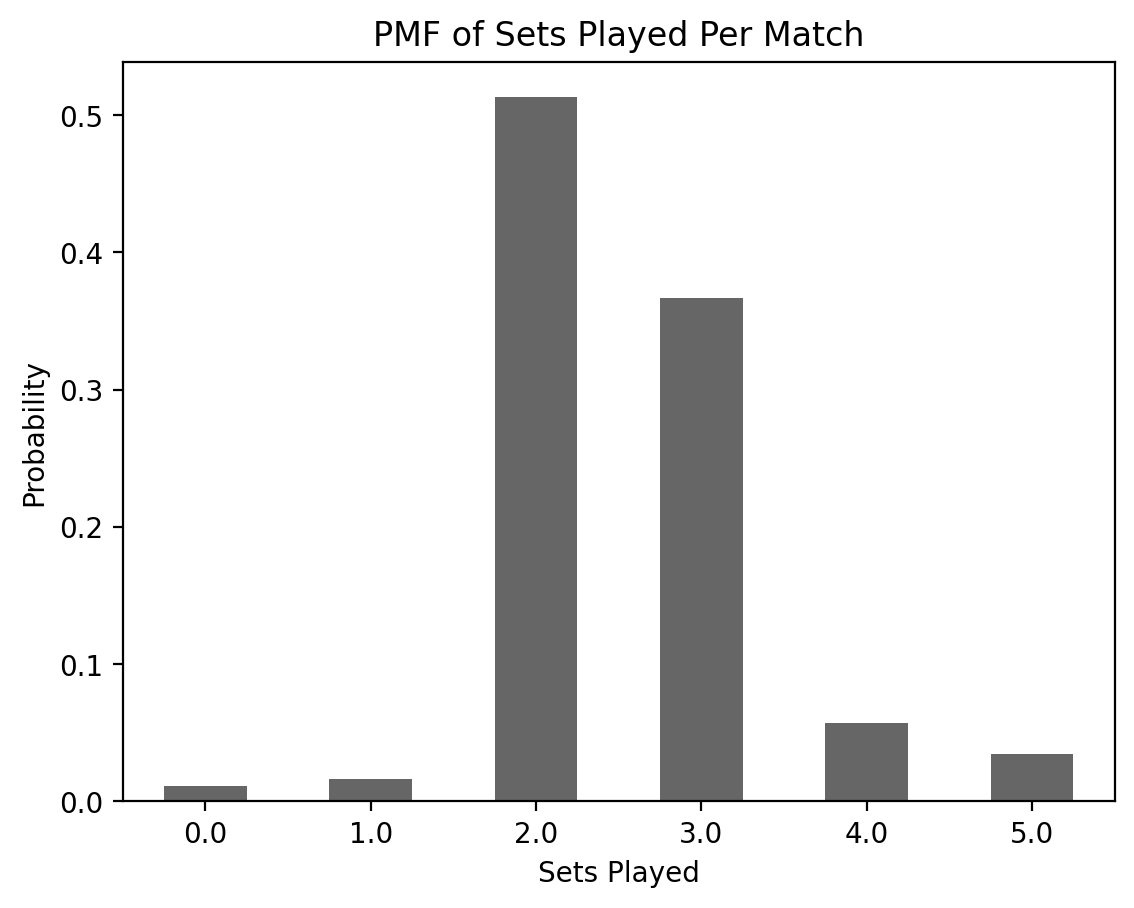

In [11]:
sets_per_match=db[['Wsets', 'Lsets']].sum(axis=1)
plt.figure()
sets_per_match.value_counts(normalize=True).sort_index().plot(kind='bar', color='black', alpha=0.6)
plt.title('PMF of Sets Played Per Match')
plt.xlabel('Sets Played')
plt.ylabel('Probability')
plt.xticks([0,1,2,3,4,5], rotation=0)
plt.show()

## Question 8

Q8) What is the probability of winning the match given that he won the first set?

In [12]:
matches_first_set_won=db[db["W1"]>db["L1"]]
matches_first_set_lost=db[db["W1"]<db["L1"]]
win_probability = len(matches_first_set_won)/(len(matches_first_set_won)+len(matches_first_set_lost))
print(f"Probability of winning the match after winning the first set: {win_probability}")

Probability of winning the match after winning the first set: 0.806427121585398


## Question 9

Q9) Analyse the distribution of players from each country. Also display its PMF.

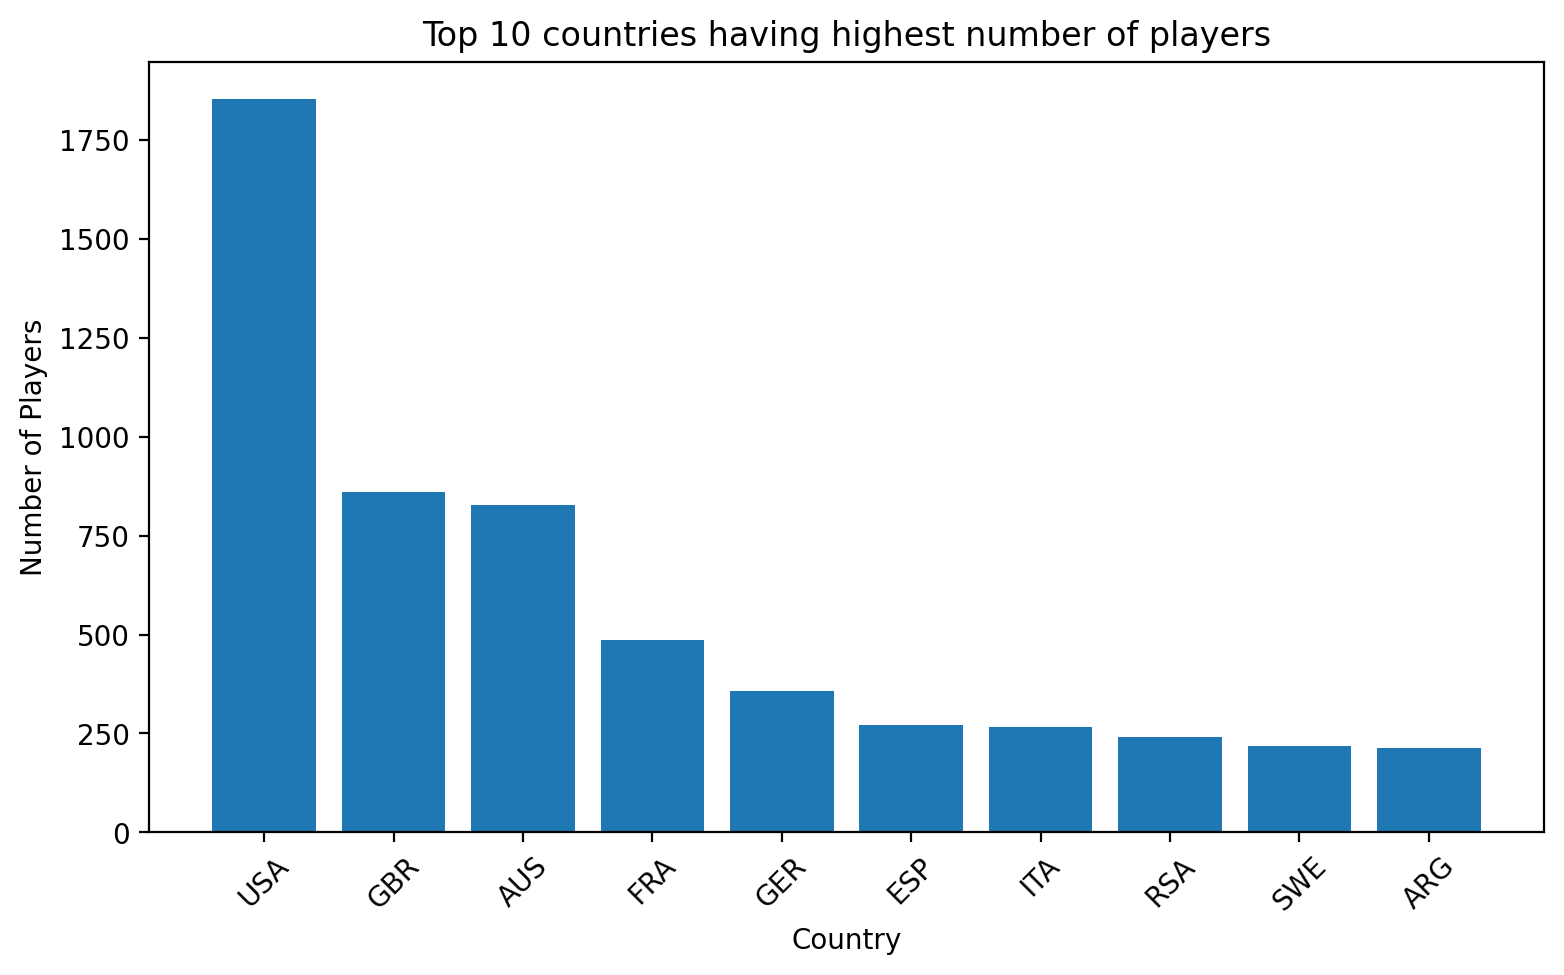

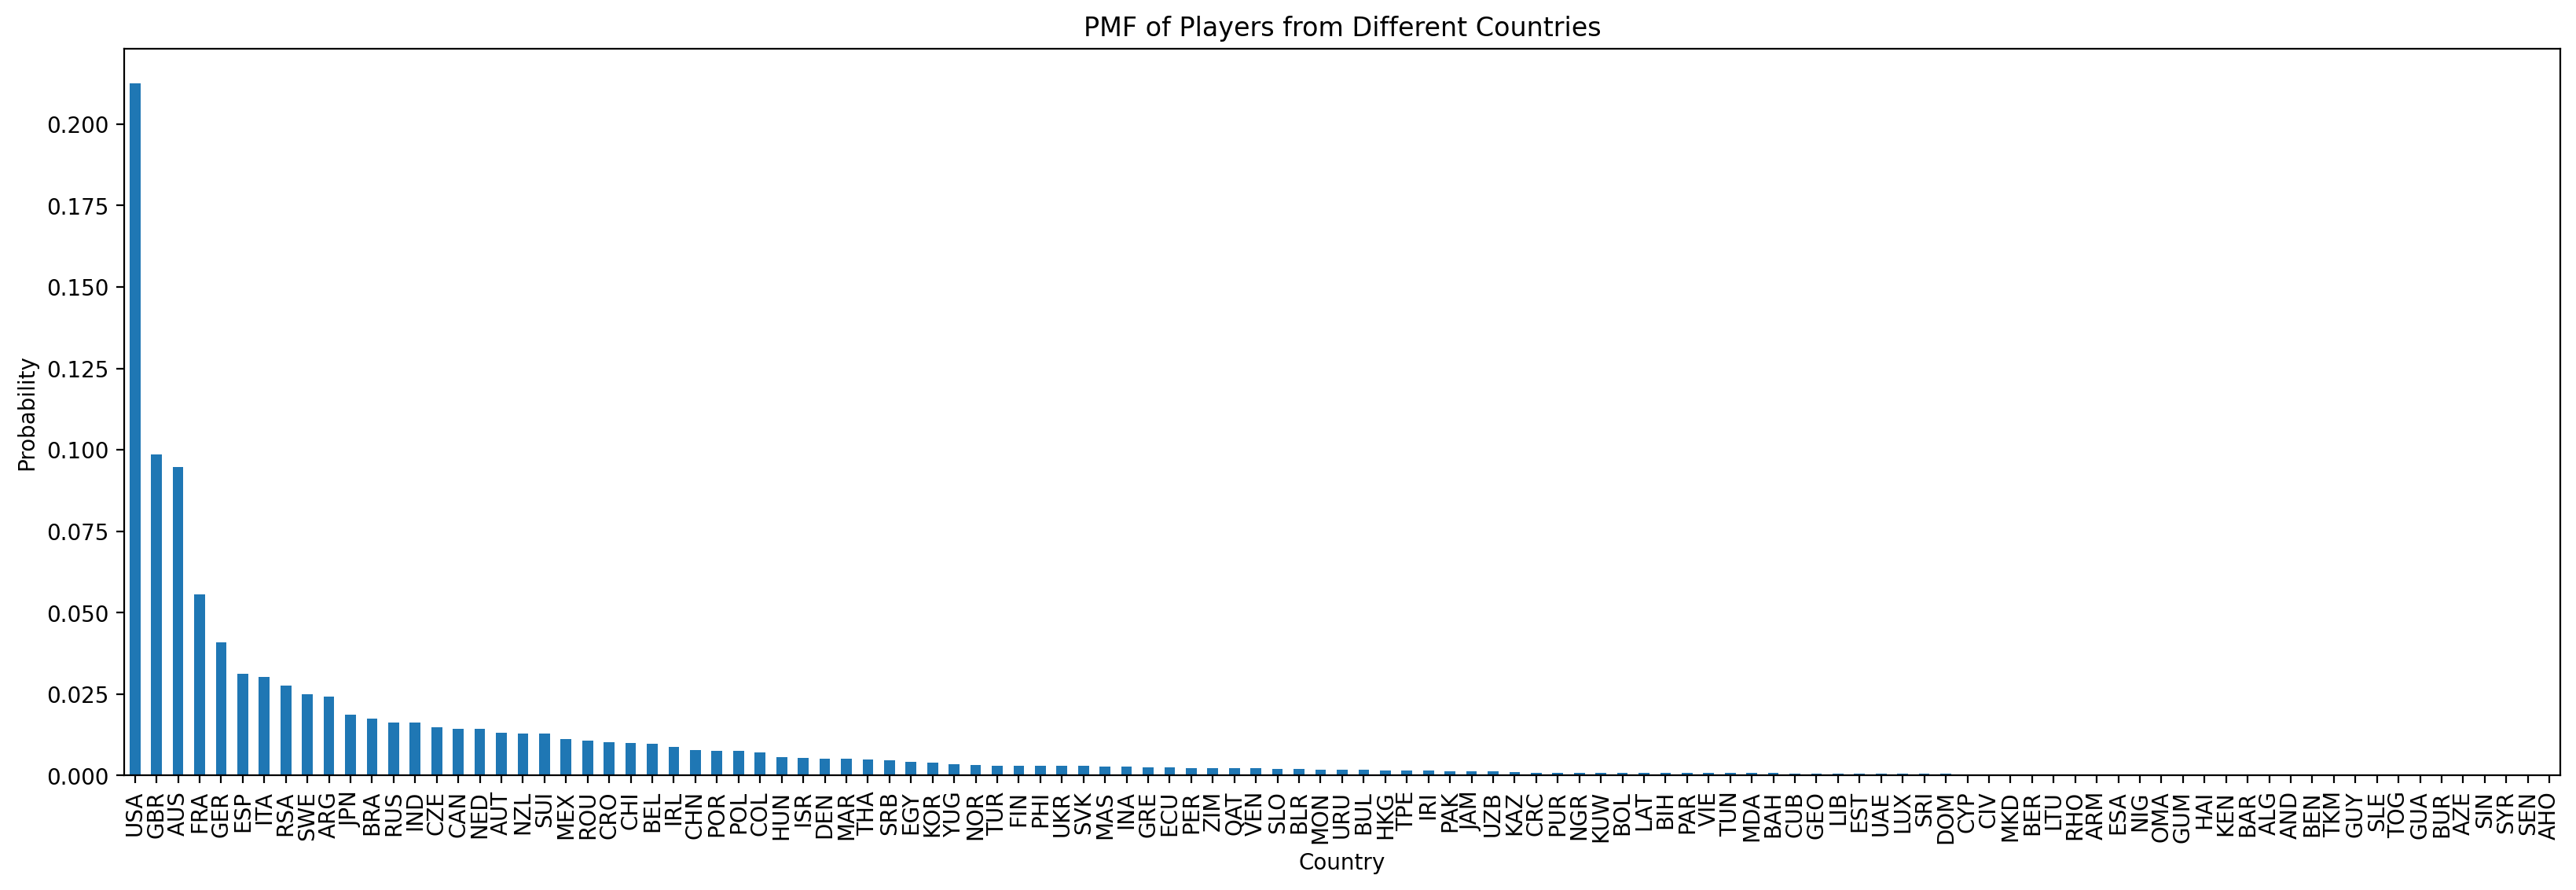

In [13]:
players_per_country = atp_players['flag_code'].value_counts()
total_players=players_per_country.sum()
pmf=players_per_country/total_players
top_countries = players_per_country.head(10)
plt.figure(figsize=(9, 5))
plt.bar(top_countries.index, top_countries.values)
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.title('Top 10 countries having highest number of players')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,6))
pmf.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Probability')
plt.title('PMF of Players from Different Countries')
plt.xticks(rotation=90)
plt.show()


- We can see that the highest number of players are from USA, followed by Great Britain and Australia.

## Question 10

Q10) Plot a scatter plot between height and weight for all the players.

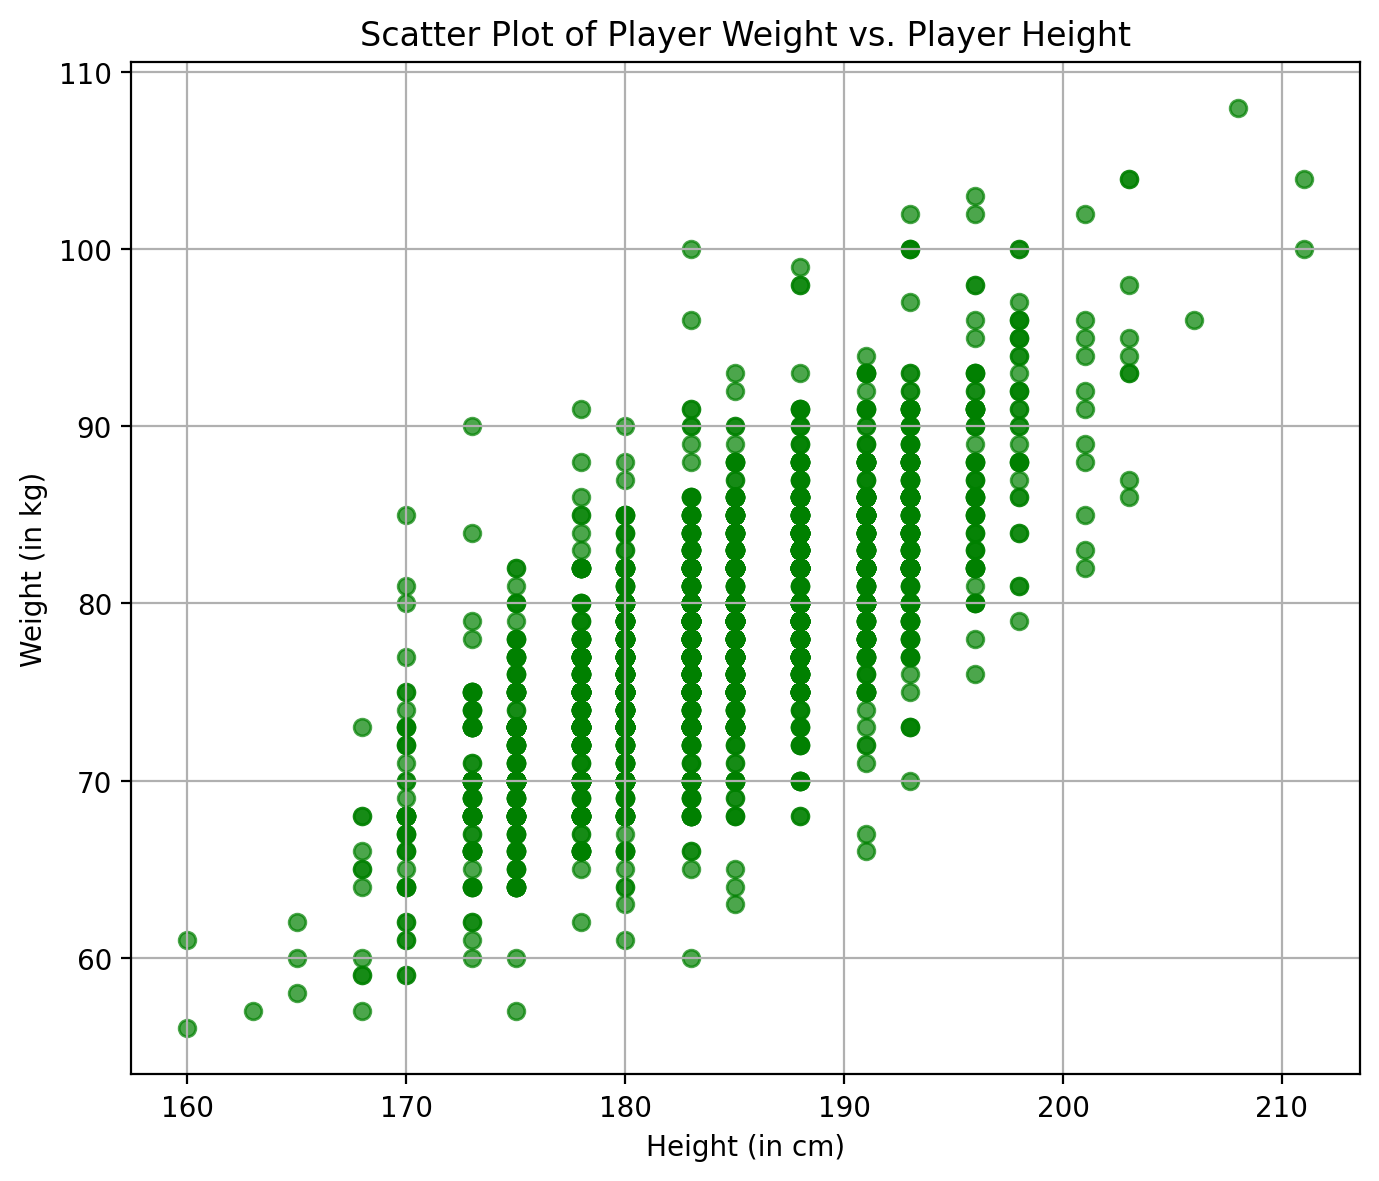

In [14]:
scatter_data=atp_players.copy()
scatter_data = scatter_data.dropna(subset=['height_cm', 'weight_kg'])
scatter_data = scatter_data[(scatter_data['weight_kg'] <= 400) & (scatter_data['weight_kg'] > 10) & (scatter_data['height_cm'] > 30)]

plt.figure(figsize=(7,6))
plt.scatter(scatter_data['height_cm'], scatter_data['weight_kg'],color="green", alpha=0.7)
plt.xlabel('Height (in cm)')
plt.ylabel('Weight (in kg)')
plt.title('Scatter Plot of Player Weight vs. Player Height')
plt.tight_layout()
plt.grid(True)
plt.show()

## Question 11

Q11) Calculate the BMI of all players and plot a box plot.

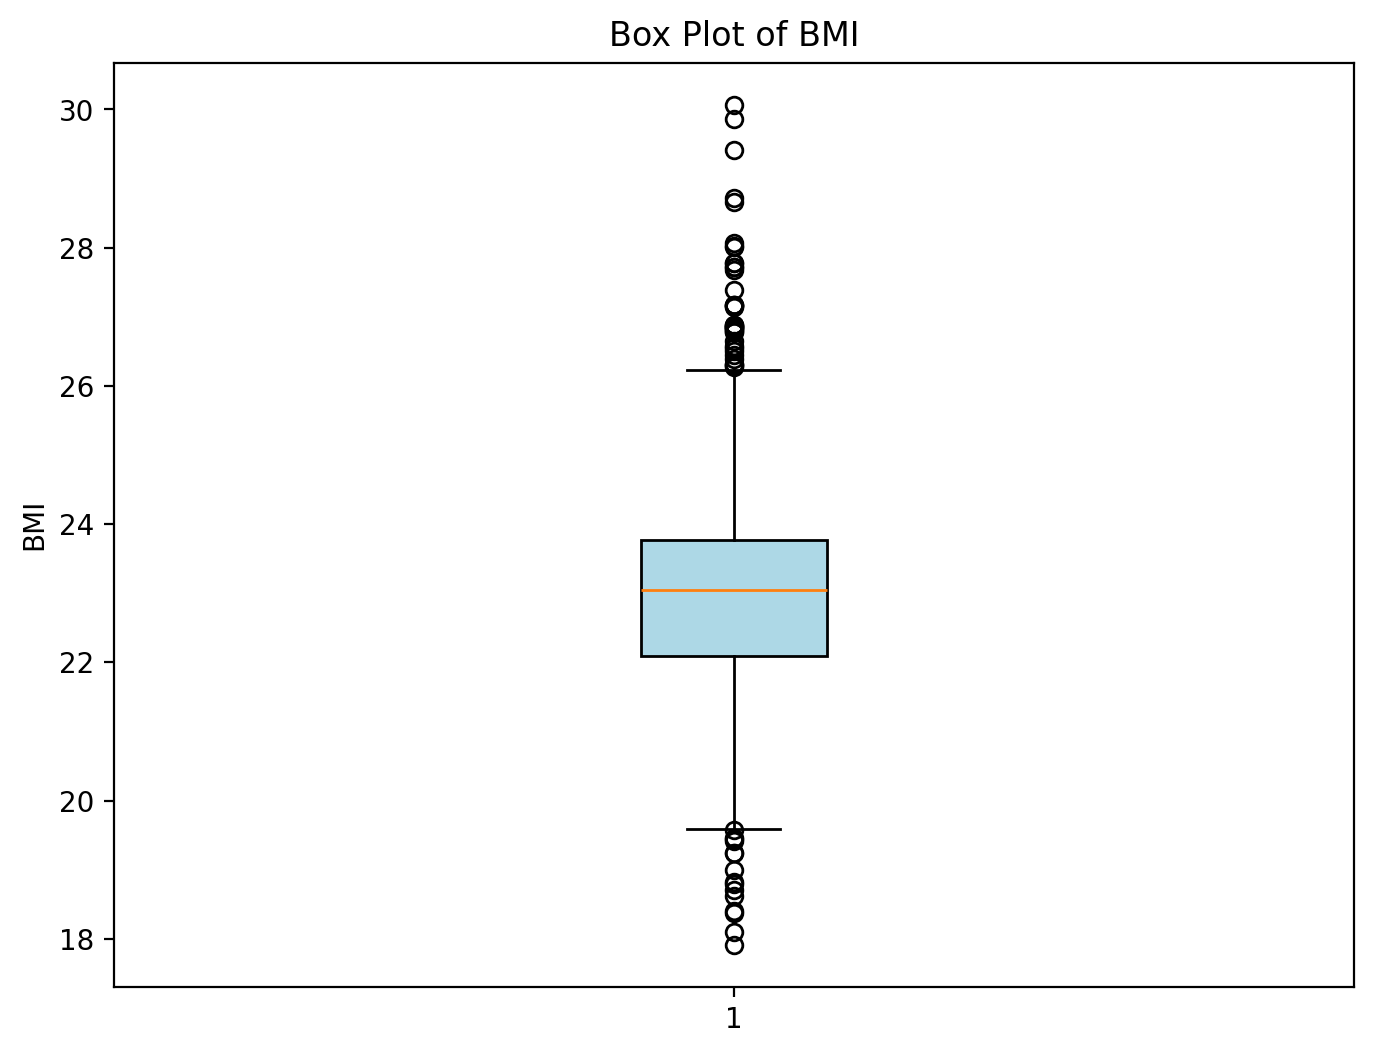

In [15]:
bmi_data=atp_players.copy()    # to avoid changing the original data
bmi_data["BMI"]=bmi_data["weight_kg"]/((bmi_data["height_cm"]/100)**2)
bmi_data.dropna(subset=["BMI"], inplace=True)
bmi_data=bmi_data[(bmi_data["BMI"]<100)&(bmi_data["BMI"] >0)]
plt.figure(figsize=(8, 6))
bp=plt.boxplot(bmi_data["BMI"], patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot of BMI")
plt.ylabel("BMI")
plt.show()

## Question 12

Q12) Calculate the variance of height and weight, and also their covariance and correlation coefficient.

In [16]:
height_variance=atp_players['height_cm'].var()
weight_variance=atp_players['weight_kg'].var()
covariance=atp_players['height_cm'].cov(atp_players['weight_kg'])
correlation_coefficient=atp_players['height_cm'].corr(atp_players['weight_kg'])
print("Variance of Height:", height_variance)
print("Variance of Weight:", weight_variance)
print("Covariance between Height and Weight:", covariance)
print("Correlation Coefficient between Height and Weight:", correlation_coefficient)

Variance of Height: 1407.058827102656
Variance of Weight: 410.5906312118154
Covariance between Height and Weight: 588.3577511145842
Correlation Coefficient between Height and Weight: 0.7635343710043526


## Question 13

Q13) What is the probability that a higher-ranked player defeats a lower-ranked player?

In [17]:
def convert_to_numeric_with_errors(df, column):
    try:
        df[f"{column}_copy"]=pd.to_numeric(df[column])
    except ValueError:
        df[f"{column}_copy"]=pd.NA

convert_to_numeric_with_errors(db,'WRank')
convert_to_numeric_with_errors(db,'LRank')
high_beats_low=len(db[db["WRank_copy"]<db["LRank_copy"]])/len(db)
print("Prorbability of higher-ranked player defeating a lower-ranked player:", high_beats_low)

Prorbability of higher-ranked player defeating a lower-ranked player: 0.0


## Question 14

Q14) Find the top 10 players on the basis of win percentage , number of wins and win streaks. Based on this data, who are the overall top 3 players of Tennis?

In [18]:
# Win Percentage
matches_played = {}
matches_won = {}
players_list=list(atp_players["full_name"].unique())
# print(players_list)
for player in players_list:
  player=player+"."
  if db[(db['Winner'] == player) | (db['Loser'] == player)].shape[0]!=0:
    matches_played[player] = db[(db['Winner'] == player) | (db['Loser'] == player)].shape[0]
    matches_won[player] = db[db['Winner'] == player].shape[0]

players_df = pd.DataFrame({'Player': matches_played.keys(),
                            'Matches Played': matches_played.values(),
                            'Matches Won': matches_won.values()})
players_df["Win Percentage"]=(players_df["Matches Won"]/players_df["Matches Played"])*100
top_10_win_percentage=players_df[["Player", "Win Percentage"]].sort_values("Win Percentage", ascending=False).head(10)
print("Top 10 players ranked by Win Percentage:")
top_10_win_percentage=top_10_win_percentage.reset_index().drop(columns=["index"])
display(top_10_win_percentage)

Top 10 players ranked by Win Percentage:


,Player,Win Percentage
0,Djokovic N.,83.964545
1,Federer R.,82.763433
2,Nadal R.,82.573941
3,Agassi A.,75.920680
4,Roddick A.,74.644243
5,Murray A.,72.831766
6,Medvedev D.,71.459695
7,Sampras P.,71.014493
8,Hewitt L.,70.701513
9,Rafter P.,69.902913


In [19]:
# Number of Wins
top_10_num_wins = players_df[["Player", "Matches Won"]].sort_values("Matches Won", ascending=False).head(10)
print("Top 10 players ranked by Number of Wins:")
top_10_num_wins=top_10_num_wins.reset_index().drop(columns=["index"])
display(top_10_num_wins)

Top 10 players ranked by Number of Wins:


,Player,Matches Won
0,Federer R.,1186
1,Djokovic N.,1042
2,Nadal R.,1033
3,Ferrer D.,699
4,Murray A.,697
5,Berdych T.,593
6,Gasquet R.,588
7,Roddick A.,577
8,Verdasco F.,545
9,Wawrinka S.,545


In [20]:
# Win Streaks
atp_date=db.sort_values(by="Date")
finals_data=atp_date[atp_date["Round"]=="The Final"]
win_streak={}
current_streak={}
max_win_streak={}
for index,row in finals_data.iterrows():
  winner=row["Winner"]
  loser=row["Loser"]
  if winner in current_streak:
    current_streak[winner]+=1
    max_win_streak[winner]=max(max_win_streak.get(winner,0),current_streak[winner])
  else:
    current_streak[winner]=1
    max_win_streak[winner]=1
  if loser in current_streak:
    current_streak[loser]=0
max_win_streak_dict={"Player":list(max_win_streak.keys()),"Max Win Streak of Tournaments":list(max_win_streak.values())}
max_win_streak_df=pd.DataFrame(max_win_streak_dict)
top_10_win_streaks=max_win_streak_df.sort_values(by="Max Win Streak of Tournaments",ascending=False).head(10)
top_10_win_streaks=top_10_win_streaks.reset_index().drop(columns=["index"])

print("Top 10 players ranked by Longest Win Streaks:")
display(top_10_win_streaks)

Top 10 players ranked by Longest Win Streaks:


,Player,Max Win Streak of Tournaments
0,Federer R.,24
1,Nadal R.,14
2,Wawrinka S.,11
3,Hewitt L.,10
4,Djokovic N.,10
5,Roddick A.,8
6,Haas T.,8
7,Kuerten G.,7
8,Rublev A.,7
9,Fritz T.,6


- From the above three leaderboards, we can conclude that Roger Federer, Novak Djokovic and Rafael Nadal are the overall top 3 players of tennis.

## Question 15

Q15) Find the top 3 betting platforms with the highest accuracy.

In [21]:
betters=["B365","B&W","CB","EX","LB","GB","IW","PS","SB","SJ","UB"]
platform=["Bet365","Bet&Win", "Centrebet", "Expekt", "Ladbrokes", "Gamebookers", "Interwetten", "Pinnacles Sports", "Sportingbet","Stan James", "Unibet"]
accuracies=[]
for i in range(len(betters)):
  better=betters[i]
  data_NaN_dropped = db.dropna(subset=[f"{better}W", f"{better}L"])
  all_matches = len(data_NaN_dropped)
  correct_predictions = 0
  for index, row in data_NaN_dropped.iterrows():
      odds_winner = row[f"{better}W"]
      odds_loser = row[f"{better}L"]
      try:
        if odds_winner > odds_loser:
            correct_predictions+=1
      except:
        pass
  accuracy = correct_predictions/all_matches
  accuracies.append(accuracy)

accuracy_data = list(zip(platform, accuracies))
accuracy_data.sort(key=lambda x: x[1], reverse=True)
print("Platforms arranged in descending order according to their Accuracy:\n")
for i in range(len(accuracy_data)):
    print(accuracy_data[i][0], ":", accuracy_data[i][1])

Platforms arranged in descending order according to their Accuracy:

Gamebookers : 0.32166172106824925
Bet&Win : 0.31814038286235186
Sportingbet : 0.30254424778761063
Centrebet : 0.3025248486233291
Pinnacles Sports : 0.30153451660723585
Bet365 : 0.2930221803240782
Unibet : 0.2924749320588511
Expekt : 0.29080713506381467
Interwetten : 0.2894894445276239
Ladbrokes : 0.2818954178664107
Stan James : 0.27780631903416386


- Therefore, the top 3 betting platforms are Gamebookers, Bet&Win and Sportingbet.

# References

[1] “ATP Match data - dataset by tylerudite,” data.world. https://data.world/tylerudite/atp-match-data (accessed Apr. 22, 2024).

[2] Pandas, “pandas documentation — pandas 1.0.1 documentation,” pandas.pydata.org. https://pandas.pydata.org/docs/

[3] NumPy, “Overview — NumPy v1.19 Manual,” numpy.org, 2022. https://numpy.org/doc/stable/

[4] “Users guide — Matplotlib 3.5.0 documentation,” matplotlib.org. https://matplotlib.org/stable/users/index.html

[5] “Ignore UserWarning from openpyxl using pandas,” Stack Overflow. https://stackoverflow.com/questions/64420348/ignore-userwarning-from-openpyxl-using-pandas (accessed Apr. 22, 2024).
